# 3. 분류

## 3.1. MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 3.2. 이진 분류기 훈련

In [ ]:
# '8'과 '8 아님'을 구분하는 이진 분류기를 위한 타깃 벡터
y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [ ]:
some_digit = X[17]

sgd_clf.predict([some_digit])

array([ True])

In [ ]:
y[17] # 실제로 8임

'8'

## 3.3. 성능 측정

### 3.3.1. 교차 검증을 사용한 정확도 측정

In [ ]:
# 3개의 검증 폴드로 정확도 측정 -> cross_val_score() 함수
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

# 참고 : 모두 '8 아님' 클래스로 예측하는 분류기도 정확도는 0.9

array([0.909  , 0.9286 , 0.88285])

### 3.3.2. 오차 행렬

In [ ]:
# cross_val_predict() 함수 -> 예측 결과 반환
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[50006,  4143],
       [ 1448,  4403]])

### 3.3.3. 정밀도와 재현율

In [ ]:
from sklearn.metrics import precision_score, recall_score

# 정밀도
precision_score(y_train_8, y_train_pred)

0.515211794991809

In [ ]:
# 재현율
recall_score(y_train_8, y_train_pred)

0.7525209365920356

In [ ]:
# 정밀도와 재현율의 조화 평균, F1 점수
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)


0.6116552059456831

### 3.3.4. 정밀도/재현율 트레이드오프

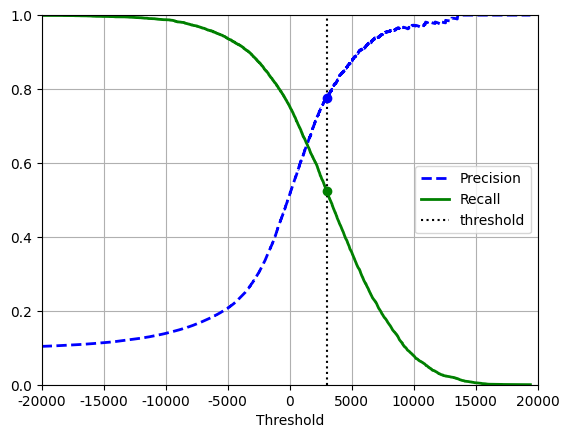

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
threshold = 3000

y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# 추가 코드 _ 그래프 설정
idx = (thresholds >= threshold).argmax()  # 첫 번째 index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-20000, 20000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

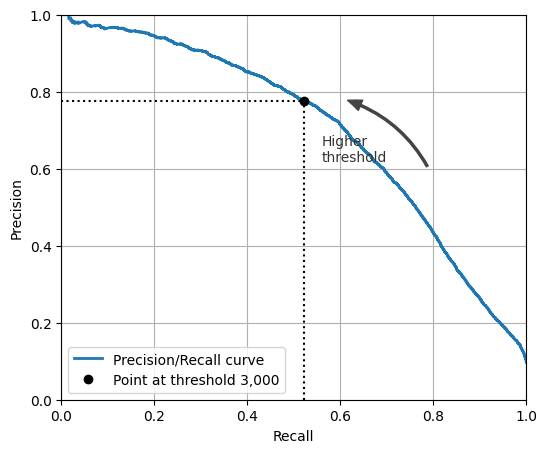

In [ ]:
# 정밀도 / 재현율 그래프
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

### 3.3.5. ROC 곡선

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

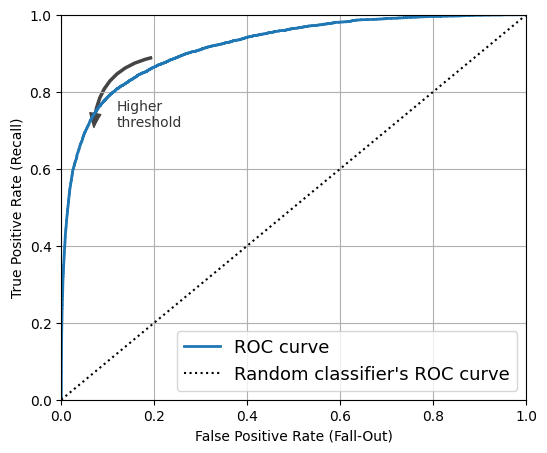

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

np.float64(0.9192599874103056)

## 3.4. 다중 분류

In [ ]:
# 자동으로 OvO 전략을 사용해 SVC를 훈련시킴.
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
# 가장 많은 쌍에서 승리한 클래스인 '8' 선택
svm_clf.predict([some_digit])

array(['8'], dtype=object)

In [ ]:
# 성능 측정 : 정확도
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

## 3.5 오류 분석

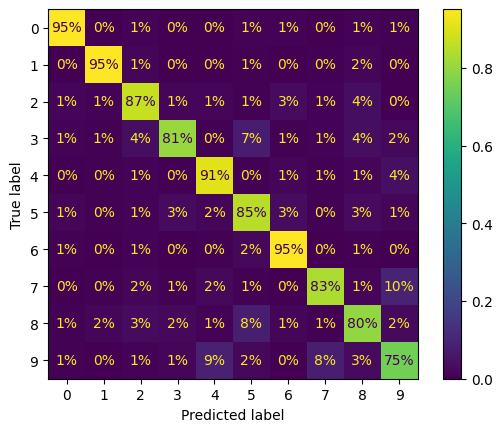

In [ ]:
# 오차 행렬을 컬러 그래프로 (행별로 정규화된 오차 행렬)
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

Text(0.5, 1.0, 'Errors normalized by column')

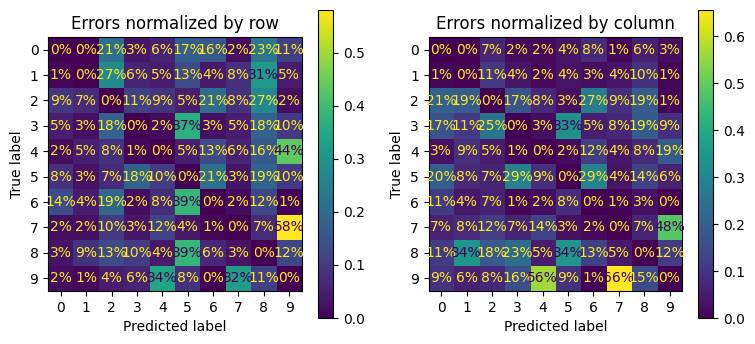

In [ ]:
# 올바른 예측에 대한 가중치를 0으로 -> 많은 숫자가 8로 잘못 분류되었다는 사실을 쉽게 알 수 있음
sample_weight = (y_train_pred != y_train)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")

## 3.6 다중 레이블 분석



In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7') # 첫번째 타깃 레이블
y_train_odd = (y_train.astype('int8')%2 == 1) # 두번째 타깃 레이블
y_multilabel = np.c_[y_train_large, y_train_odd] # 두 타깃 레이블이 담긴 배열

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
# 8>7, 8%2==0
knn_clf.predict([some_digit])

array([[ True, False]])

In [ ]:
# 성능 측정 : F1 점수
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

## 3.7. 다중 출력 분류

In [ ]:
def plot_digit(data):
    plt.imshow(data.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [ ]:
# 원래 데이터에 잡음 추가, 원본을 라벨로 사용
np.random.seed(42)  # 동일하게 재현되게 하려고 지정합니다
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

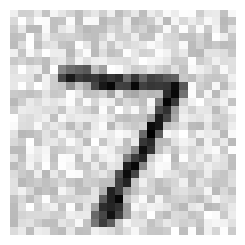

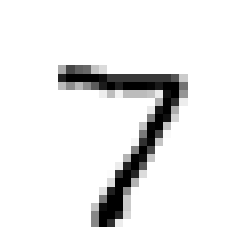

In [ ]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

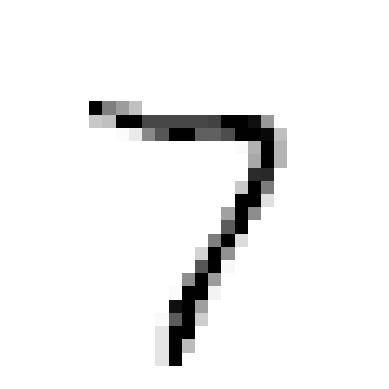

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()